# Load dependencies

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
import seaborn as sns
from yassineRLM import MLR_FS
from sklearn.metrics import r2_score, mean_squared_error

# Load data

In [10]:
df = pd.read_excel('descriptors_output1.xlsx',index_col=0)
df = df.loc[:,(df ==0).sum()<np.round(df.shape[0]*0.6)] 

In [11]:
df.shape

(34, 112)

# Data preparation

In [12]:
x = df.drop('IC50',axis=1)
y = df.loc[:,'IC50']


col = x.columns
x.columns = np.arange(x.shape[1])

<Axes: >

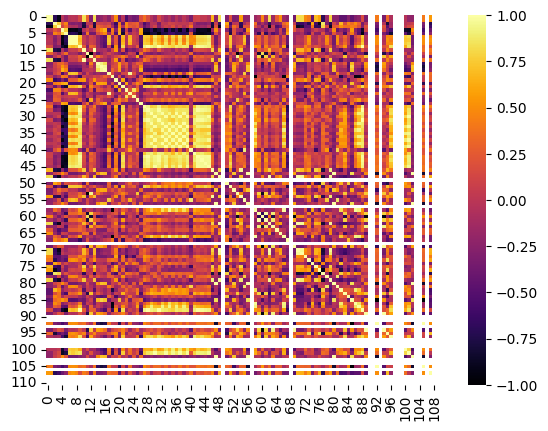

In [21]:
sns.heatmap(x.corr(), vmin=-1, vmax = 1, cmap = 'inferno')

<Axes: xlabel='mol'>

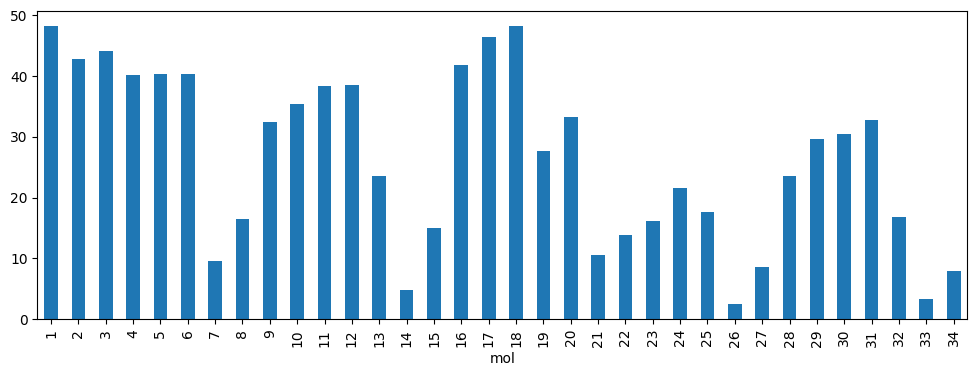

In [26]:
y.plot.bar(figsize = (12, 4))

# split scale data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

m = x_train.mean()
sd = x_train.std()

x_train = x_train.loc[:,sd !=0]
x_test = x_test.loc[:,sd !=0]

In [6]:
X_train = (x_train-m)/sd
X_test = (x_test-m)/sd

# Descriptors selection

In [7]:
m = MLR_FS(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test, num_vars=6, Kfold=3)

## Selction process

In [8]:
m.tune()

98
------------------------------------------------  Optimization of the process has started ---------------------------------------------
---------------##---------#####---------##-----------------                                                            
***** R²train : [85]**** R²cv : [72]**** R²test : [56]*                                                                
***** N Predictiors : [5]    *********** Maximum Correlation Value: [0.69]*                                            
[7.0, 28.0, 59.0, 85.0, 95.0]                                                                                          
''---------------------------- evolution noticed, hence a new model was saved-------------------------------''         
---------------##---------#####---------##-----------------                                                            
***** R²train : [80]**** R²cv : [54]**** R²test : [33]*                                                                
***** N Predictiors :

KeyboardInterrupt: 

# Model with selected Descriptors

In [ ]:
selected = [0, 51, 52, 66, 72, 107] 
variables = np.array(col)[selected]
variables

In [ ]:
r=LinearRegression()
r.fit(X_train.iloc[:,selected],y_train)

In [ ]:
r.coef_

In [ ]:
r.intercept_

In [ ]:
yc = r.predict(X_train.iloc[:,selected])
ycv = cross_val_predict(r, X_train.iloc[:,selected], y_train , cv = 3)
yt = r.predict(X_test.iloc[:,selected])

# R squared

In [ ]:
r2c = r2_score(y_train, yc)
r2cv = r2_score(y_train, ycv)
r2t = r2_score(y_test, yt)

In [ ]:
np.round([r2c, r2cv, r2t],2)

# rmse

In [ ]:
rmsec = np.sqrt(mean_squared_error(y_train, yc))
rmsecv = np.sqrt(mean_squared_error(y_train, ycv))
rmset =np.sqrt(mean_squared_error(y_test, yt))

In [ ]:
np.round([rmsec, rmsecv, rmset])